In [1]:
import os
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [2]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [3]:
data_path = os.path.join(os.getcwd(), 'data', 'to_analyse')
dataset = load_files(data_path, shuffle=False, categories=['hits'])
print("n_samples: %d" % len(dataset.data))

n_samples: 660


In [4]:
n_samples = 1000
n_features = 1000
n_topics = 10
n_top_words = 20

data_samples = dataset.data #[:n_samples]

In [5]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_samples)

In [6]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data_samples)
print(tf.shape)

(660, 1000)


In [7]:
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)

Fitting the NMF model with tf-idf features, n_samples=1000 and n_features=1000...


In [8]:
print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model:
Topic #0:
people data like work new time research science world just use way make social information need years news different said
Topic #1:
learning machine deep data tensorflow algorithms models model google training algorithm blog networks learn cloud python course neural video language
Topic #2:
neural networks network input sequence memory layer neurons deep output training layers net function error state paper computer architecture framework
Topic #3:
brain neurons activity brains depression human disease areas mice cells says neural sleep researchers genes mental memory cognitive connections intelligence
Topic #4:
tests test testing code end unit automation production developers run automated dependencies engineers performance build developer write infrastructure team framework
Topic #5:
star nasa earth stars space galaxies light surface energy material red universe black launch years water temperature image close center
Topic #6:
health patients research 

In [9]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

Fitting LDA models with tf features, n_samples=1000 and n_features=1000...


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=10, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [63]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0:
test tests code function state example new use end testing public data make object class input using build value need
Topic #1:
said driving car tax company 3d musk cars tesla year tech california self 2016 autonomous parts time government new says
Topic #2:
like new people work research data time just world years science way make said team use source human different researchers
Topic #3:
social facebook media information news trust political knowledge twitter trump items north users countries example use country sources context memory
Topic #4:
brain health people patients study research risk disease drug studies medical treatment activity evidence blood mental depression effects university new
Topic #5:
use com windows app using devices google server like web run new used source apps security network microsoft https tensorflow
Topic #6:
doctor age workers older time people work old like new women years young series benefit special year character lead r

In [78]:
from textacy.tm import TopicModel
model = TopicModel('lda', n_topics=10)
model.fit(tf)
model

TopicModel(n_topics=10, model=LatentDirichletAllocation)

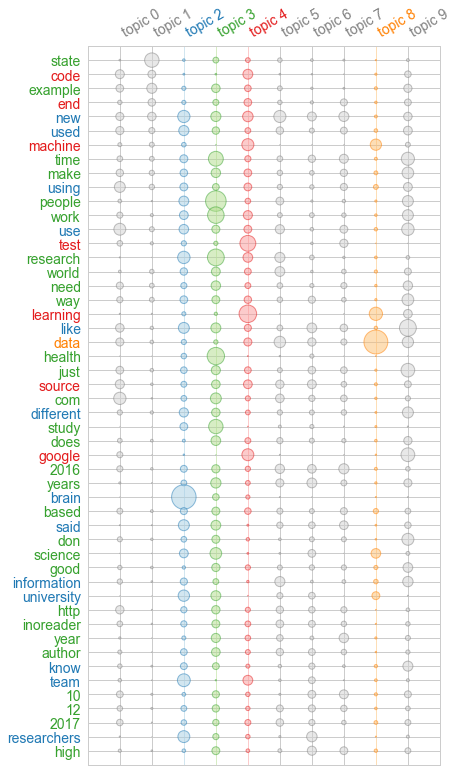

In [80]:
import matplotlib.pyplot as plt
model.termite_plot(tf, tf_feature_names, topics=-1, n_terms=50, highlight_topics=[2, 3, 4, 8])
plt.show()

In [82]:
from textacy.tm import TopicModel
model = TopicModel('lda', n_topics=7)
model.fit(tf)

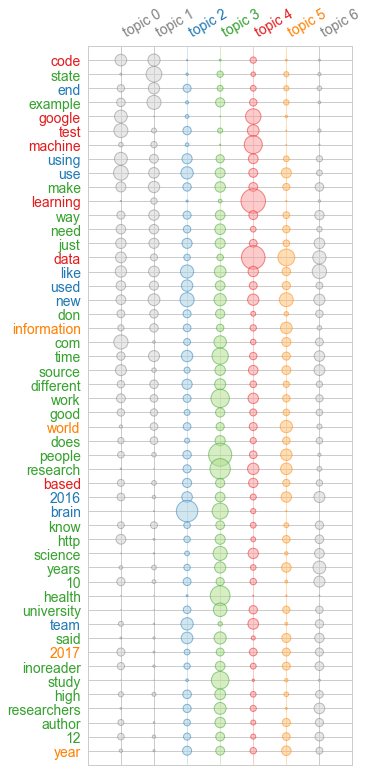

In [77]:
import matplotlib.pyplot as plt
model.termite_plot(tf, tf_feature_names, topics=-1, n_terms=50, highlight_topics=[2, 3, 4, 5])
plt.show()

In [85]:
from textacy.tm import TopicModel
model = TopicModel('lda', n_topics=6)
model.fit(tf)

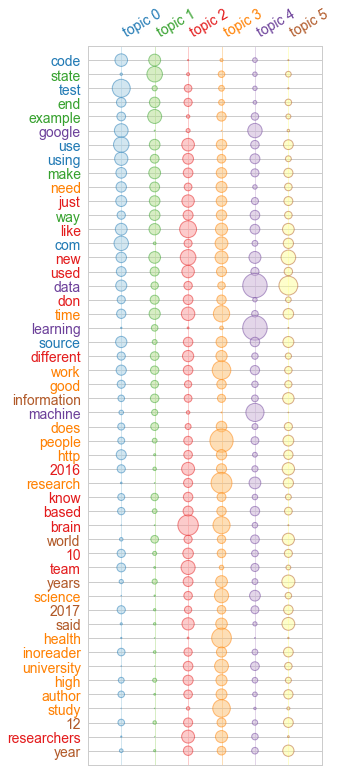

In [94]:
import matplotlib.pyplot as plt
model.termite_plot(tf, tf_feature_names, topics=-1, n_terms=50, highlight_topics=list(range(0,6)))
plt.show()